In [6]:
import pandas as pd
import numpy as np
from tmap.tda import mapper, Filter
from tmap.tda.cover import Cover
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tmap.tda.plot import show, Color,tm_plot,vis_progressX
from tmap.tda.metric import Metric
from tmap.tda.utils import optimize_dbscan_eps
from sklearn.preprocessing import LabelEncoder
from sklearn import svm, metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv('MKL_train.csv')
out=data['out']
data=data.iloc[:,0:15]#data=data.iloc[:,0:452]

In [8]:
data_test=pd.read_csv('MKL_test.csv')
out_test=data_test['out']
data_test=data_test.iloc[:,0:15]#data_test=data_test.iloc[:,0:452]

In [9]:
clf = svm.SVC()
clf.fit(data, out)
y_pred=clf.predict(data)
y_pred_test=clf.predict(data_test)
print(metrics.accuracy_score(out, y_pred))
print(metrics.accuracy_score(out_test, y_pred_test))


0.8942731277533039
0.8245614035087719


In [10]:
lens = [[Filter.L1Centrality()],[Filter.LinfCentrality()],[Filter.GaussianDensity(h=1)],[Filter.GaussianDensity(h=5)],
        [Filter.GaussianDensity(h=8)],[Filter.GaussianDensity(h=10)],[Filter.PCA(components=[0])],[Filter.PCA(components=[1])],
        [Filter.PCA(components=[2])],[Filter.PCA(components=[3])],[Filter.TSNE(components=[0])],[Filter.TSNE(components=[1])],
        [Filter.TSNE(components=[2])],[Filter.MDS(components=[0])],[Filter.MDS(components=[1])],
        [Filter.MDS(components=[2])],[Filter.MDS(components=[3])],[Filter.UMAP(components=[0])],[Filter.UMAP(components=[1])],
        [Filter.UMAP(components=[2])],[Filter.UMAP(components=[3])]]

In [11]:
types=LabelEncoder().fit_transform(out.astype(str).ravel()).reshape(-1, 1)#no se si cal
types_test=LabelEncoder().fit_transform(out_test.astype(str).ravel()).reshape(-1, 1)
k=0
accs=np.zeros([21,21])
accs_test=np.zeros([21,21])
acc_vec=np.zeros([10,])
acc_vec_test=np.zeros([10,])
for filter1 in lens:
    j=0
    for filter2 in lens:
        for ite in range(0,10):
            tm = mapper.Mapper(verbose=1)
            projected_X = tm.filter(data, lens=filter1)
            projected_X = tm.filter(data, lens=filter2)
            #clusterer = DBSCAN(eps=0.75,min_samples=1)
            #cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)
            #graph = tm.map(data=StandardScaler().fit_transform(data), cover=cover, clusterer=clusterer)
            #X=graph.nodePos

            tm_test = mapper.Mapper(verbose=1)
            projected_X_test = tm_test.filter(data_test, lens=filter1)
            projected_X_test = tm_test.filter(data_test, lens=filter2)
            #clusterer_test = DBSCAN(eps=0.75,min_samples=1)
            #cover_test = Cover(projected_data=MinMaxScaler().fit_transform(projected_X_test), resolution=20, overlap=0.75)
            #graph_test = tm_test.map(data=StandardScaler().fit_transform(data_test), cover=cover_test, clusterer=clusterer_test)
            #X_test=graph_test.nodePos

            #i=0
            #Y=np.zeros([len(graph.nodes),])
            #for node in range(0,len(graph.nodes)):
            #    samples=graph.node2sample(node)
            #    Y[i]=types[samples]
            #    i=i+1

            #i=0
            #Y_test=np.zeros([len(graph_test.nodes),])
            #for node in range(0,len(graph_test.nodes)):
            #    samples=graph_test.node2sample(node)
            #    Y_test[i]=types[samples]
            #    i=i+1

            clf = svm.SVC()
            clf.fit(projected_X, out)
            y_pred=clf.predict(projected_X)
            y_pred_test=clf.predict(projected_X_test)
            acc=metrics.accuracy_score(out, y_pred)
            acc_test=metrics.accuracy_score(out_test, y_pred_test)
            acc_vec[ite]=acc
            acc_vec_test[ite]=acc_test
            
        accs[k,j]=sum(acc_vec)/10
        accs_test[k,j]=sum(acc_vec_test)/10
        j=j+1
    k=k+1

Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centr

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filterin

...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by L1Centrality.


Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.


Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by T

Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by T

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which us

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by U

Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by U

Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by U

Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(w

Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with d

Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filter

Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filter

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filter

Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filter

Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filter

Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) wi

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.

Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Fi

Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filter

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which u

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided eucl

...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filter

Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering 

Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering 

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been compl

Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been

Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been

Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering 

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering 

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been compl

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided eucl

Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been

Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering 

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering 

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been compl

Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided eucl

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Fi

Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filter

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which u

Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which u

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which u

Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which u

Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which u

Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filter

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which u

Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which u

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which u

Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which u

Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which u

Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filter

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which u

Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which u

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which u

Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which u

Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which u

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by 

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filte

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Centrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by L1Central

Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filter

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which u

Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which u

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which u

Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which u

Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which u

Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filter

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which u

Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which u

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which u

Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which u

Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which u

Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filter

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which u

Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which u

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which u

Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which u

Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which u

Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filter

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by GaussianDensity.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Fi

Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which u

Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by TSNE.
...calculate Filter(which u

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which u

Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which u

Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which u

In [64]:
accs

In [68]:
np.nonzero(accs > 0.78)

(array([11, 20], dtype=int64), array([11, 18], dtype=int64))

# TOP 5 train

In [15]:
lens = [[Filter.L1Centrality()],[Filter.LinfCentrality()],[Filter.GaussianDensity(h=1)],[Filter.GaussianDensity(h=5)],
        [Filter.GaussianDensity(h=8)],[Filter.GaussianDensity(h=10)],[Filter.PCA(components=[0])],[Filter.PCA(components=[1])],
        [Filter.PCA(components=[2])],[Filter.PCA(components=[3])],[Filter.TSNE(components=[0])],[Filter.TSNE(components=[1])],
        [Filter.TSNE(components=[2])],[Filter.MDS(components=[0])],[Filter.MDS(components=[1])],
        [Filter.MDS(components=[2])],[Filter.MDS(components=[3])],[Filter.UMAP(components=[0])],[Filter.UMAP(components=[1])],
        [Filter.UMAP(components=[2])],[Filter.UMAP(components=[3])]]

In [16]:
new_data=data.iloc[:,0:15]

Filtering by LinfCentrality.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


 80%|██████████████████████████████████████████████████████████████▏               | 319/400 [00:00<00:00, 3166.84it/s]

Filtering has been completed.


100%|██████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 2621.37it/s]


Mapping on data (227, 15) using lens (227, 2)
...minimal number of points in hypercube to do clustering: 1
...create 1377 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 3940 edges.
Finish TDA mapping


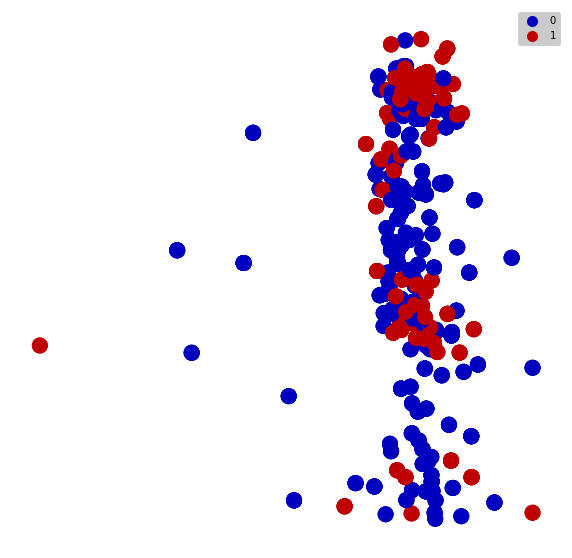

0.7371096586782862


In [22]:
tm = mapper.Mapper(verbose=1)
projected_X = tm.filter(new_data, lens=lens[1])
projected_X = tm.filter(new_data, lens=[Filter.UMAP(components=[2])])
clusterer = DBSCAN(eps=0.75,min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)
graph = tm.map(data=StandardScaler().fit_transform(new_data), cover=cover, clusterer=clusterer)
color = Color(target=out, dtype="categorical",target_by='sample')
graph.show(color=color, fig_size=(10, 10), node_size=15,with_labels=True)
X=graph.nodePos

i=0
Y=np.zeros([len(graph.nodes),])
for node in range(0,len(graph.nodes)):
    samples=graph.node2sample(node)
    Y[i]=types[samples]
    i=i+1
    
clf = svm.SVC()
clf.fit(X, Y)
y_pred=clf.predict(X)
acc=metrics.accuracy_score(Y, y_pred)
print(acc)

Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


100%|██████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 3109.07it/s]

Filtering has been completed.
Mapping on data (227, 15) using lens (227, 2)
...minimal number of points in hypercube to do clustering: 1
...create 1312 nodes.
...calculate projection coordinates of nodes.


...construct a TDA graph.
...create 3596 edges.
Finish TDA mapping


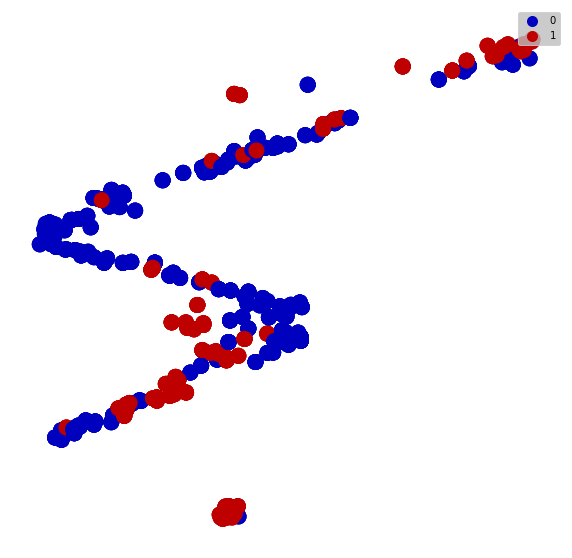

0.8277439024390244


In [23]:
tm = mapper.Mapper(verbose=1)
projected_X = tm.filter(new_data, lens=lens[18])
projected_X = tm.filter(new_data, lens=lens[17])
clusterer = DBSCAN(eps=0.75,min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)
graph = tm.map(data=StandardScaler().fit_transform(new_data), cover=cover, clusterer=clusterer)
color = Color(target=out, dtype="categorical",target_by='sample')
graph.show(color=color, fig_size=(10, 10), node_size=15,with_labels=True)

X=graph.nodePos

i=0
Y=np.zeros([len(graph.nodes),])
for node in range(0,len(graph.nodes)):
    samples=graph.node2sample(node)
    Y[i]=types[samples]
    i=i+1
    
clf = svm.SVC()
clf.fit(X, Y)
y_pred=clf.predict(X)
acc=metrics.accuracy_score(Y, y_pred)
print(acc)

Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


100%|██████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 2673.82it/s]

Filtering has been completed.
Mapping on data (227, 15) using lens (227, 2)
...minimal number of points in hypercube to do clustering: 1
...create 1365 nodes.
...calculate projection coordinates of nodes.


...construct a TDA graph.
...create 3789 edges.
Finish TDA mapping


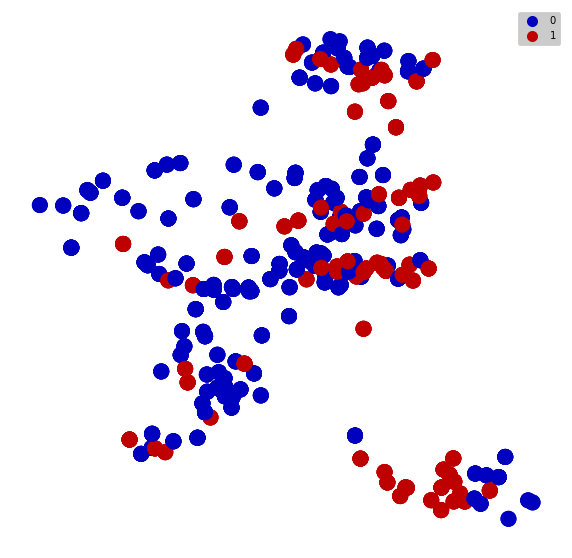

0.7597069597069597


In [24]:
tm = mapper.Mapper(verbose=1)
projected_X = tm.filter(new_data, lens=lens[19])
projected_X = tm.filter(new_data, lens=lens[19])
clusterer = DBSCAN(eps=0.75,min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)
graph = tm.map(data=StandardScaler().fit_transform(new_data), cover=cover, clusterer=clusterer)
color = Color(target=out, dtype="categorical",target_by='sample')
graph.show(color=color, fig_size=(10, 10), node_size=15,with_labels=True)

X=graph.nodePos

i=0
Y=np.zeros([len(graph.nodes),])
for node in range(0,len(graph.nodes)):
    samples=graph.node2sample(node)
    Y[i]=types[samples]
    i=i+1
    
clf = svm.SVC()
clf.fit(X, Y)
y_pred=clf.predict(X)
acc=metrics.accuracy_score(Y, y_pred)
print(acc)

Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


 62%|████████████████████████████████████████████████▌                             | 249/400 [00:00<00:00, 2471.93it/s]

Filtering has been completed.
Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.


100%|██████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 2885.40it/s]


Mapping on data (227, 15) using lens (227, 2)
...minimal number of points in hypercube to do clustering: 1
...create 1394 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 3987 edges.
Finish TDA mapping


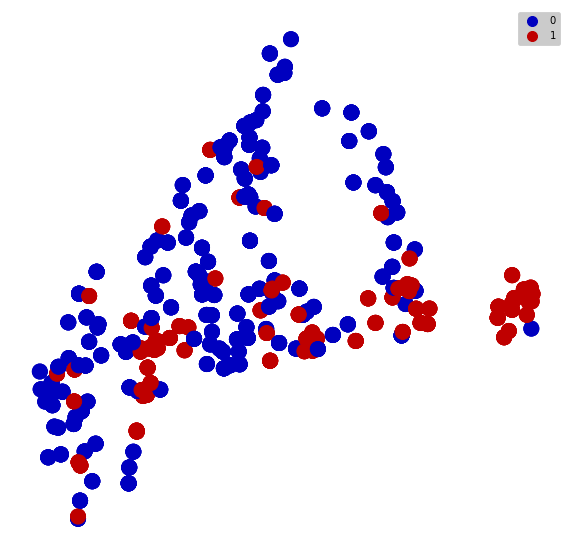

0.7654232424677188


In [25]:
tm = mapper.Mapper(verbose=1)
projected_X = tm.filter(new_data, lens=lens[20])
projected_X = tm.filter(new_data, lens=lens[8])
clusterer = DBSCAN(eps=0.75,min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)
graph = tm.map(data=StandardScaler().fit_transform(new_data), cover=cover, clusterer=clusterer)
color = Color(target=out, dtype="categorical",target_by='sample')
graph.show(color=color, fig_size=(10, 10), node_size=15,with_labels=True)

X=graph.nodePos

i=0
Y=np.zeros([len(graph.nodes),])
for node in range(0,len(graph.nodes)):
    samples=graph.node2sample(node)
    Y[i]=types[samples]
    i=i+1
    
clf = svm.SVC()
clf.fit(X, Y)
y_pred=clf.predict(X)
acc=metrics.accuracy_score(Y, y_pred)
print(acc)

Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


100%|██████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 2885.38it/s]

Filtering has been completed.
Mapping on data (227, 15) using lens (227, 2)
...minimal number of points in hypercube to do clustering: 1
...create 1305 nodes.
...calculate projection coordinates of nodes.


...construct a TDA graph.
...create 3543 edges.
Finish TDA mapping


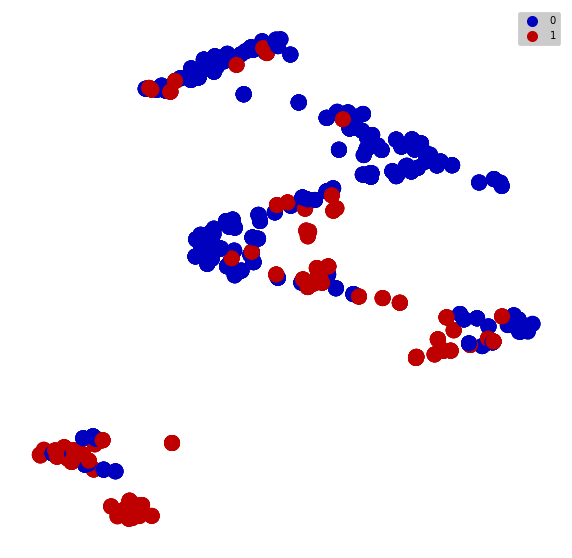

0.825287356321839


In [26]:
tm = mapper.Mapper(verbose=1)
projected_X = tm.filter(new_data, lens=lens[20])
projected_X = tm.filter(new_data, lens=lens[17])
clusterer = DBSCAN(eps=0.75,min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)
graph = tm.map(data=StandardScaler().fit_transform(new_data), cover=cover, clusterer=clusterer)
color = Color(target=out, dtype="categorical",target_by='sample')
graph.show(color=color, fig_size=(10, 10), node_size=15,with_labels=True)

X=graph.nodePos

i=0
Y=np.zeros([len(graph.nodes),])
for node in range(0,len(graph.nodes)):
    samples=graph.node2sample(node)
    Y[i]=types[samples]
    i=i+1
    
clf = svm.SVC()
clf.fit(X, Y)
y_pred=clf.predict(X)
acc=metrics.accuracy_score(Y, y_pred)
print(acc)

# TOP 5 accuracies full set

In [ ]:
frames = [data, data_test]
full_set=pd.concat(frames)
full_out=pd.concat([out,out_test])
types=LabelEncoder().fit_transform(full_out.astype(str).ravel()).reshape(-1, 1)

In [ ]:
tm = mapper.Mapper(verbose=1)
projected_X = tm.filter(full_set, lens=lens[1])
projected_X = tm.filter(full_set, lens=lens[19])
clusterer = DBSCAN(eps=0.75,min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)
graph = tm.map(data=StandardScaler().fit_transform(full_set), cover=cover, clusterer=clusterer)
color = Color(target=full_out, dtype="categorical",target_by='sample')
graph.show(color=color, fig_size=(10, 10), node_size=15,with_labels=True)
X=graph.nodePos

i=0
Y=np.zeros([len(graph.nodes),])
for node in range(0,len(graph.nodes)):
    samples=graph.node2sample(node)
    Y[i]=types[samples]
    i=i+1
    
clf = svm.SVC()
clf.fit(X, Y)
y_pred=clf.predict(X)
acc=metrics.accuracy_score(Y, y_pred)
print(acc)

In [ ]:
tm = mapper.Mapper(verbose=1)
projected_X = tm.filter(data, lens=lens[18])
projected_X = tm.filter(data, lens=lens[17])
clusterer = DBSCAN(eps=0.75,min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)
graph = tm.map(data=StandardScaler().fit_transform(data), cover=cover, clusterer=clusterer)
color = Color(target=out, dtype="categorical",target_by='sample')
graph.show(color=color, fig_size=(10, 10), node_size=15,with_labels=True)

X=graph.nodePos

i=0
Y=np.zeros([len(graph.nodes),])
for node in range(0,len(graph.nodes)):
    samples=graph.node2sample(node)
    Y[i]=types[samples]
    i=i+1
    
clf = svm.SVC()
clf.fit(X, Y)
y_pred=clf.predict(X)
acc=metrics.accuracy_score(Y, y_pred)
print(acc)

In [ ]:
tm = mapper.Mapper(verbose=1)
projected_X = tm.filter(data, lens=lens[19])
projected_X = tm.filter(data, lens=lens[19])
clusterer = DBSCAN(eps=0.75,min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)
graph = tm.map(data=StandardScaler().fit_transform(data), cover=cover, clusterer=clusterer)
color = Color(target=out, dtype="categorical",target_by='sample')
graph.show(color=color, fig_size=(10, 10), node_size=15,with_labels=True)

X=graph.nodePos

i=0
Y=np.zeros([len(graph.nodes),])
for node in range(0,len(graph.nodes)):
    samples=graph.node2sample(node)
    Y[i]=types[samples]
    i=i+1
    
clf = svm.SVC()
clf.fit(X, Y)
y_pred=clf.predict(X)
acc=metrics.accuracy_score(Y, y_pred)
print(acc)

In [ ]:
tm = mapper.Mapper(verbose=1)
projected_X = tm.filter(data, lens=lens[20])
projected_X = tm.filter(data, lens=lens[8])
clusterer = DBSCAN(eps=0.75,min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)
graph = tm.map(data=StandardScaler().fit_transform(data), cover=cover, clusterer=clusterer)
color = Color(target=out, dtype="categorical",target_by='sample')
graph.show(color=color, fig_size=(10, 10), node_size=15,with_labels=True)

X=graph.nodePos

i=0
Y=np.zeros([len(graph.nodes),])
for node in range(0,len(graph.nodes)):
    samples=graph.node2sample(node)
    Y[i]=types[samples]
    i=i+1
    
clf = svm.SVC()
clf.fit(X, Y)
y_pred=clf.predict(X)
acc=metrics.accuracy_score(Y, y_pred)
print(acc)

In [ ]:
tm = mapper.Mapper(verbose=1)
projected_X = tm.filter(data, lens=lens[20])
projected_X = tm.filter(data, lens=lens[17])
clusterer = DBSCAN(eps=0.75,min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)
graph = tm.map(data=StandardScaler().fit_transform(data), cover=cover, clusterer=clusterer)
color = Color(target=out, dtype="categorical",target_by='sample')
graph.show(color=color, fig_size=(10, 10), node_size=15,with_labels=True)

X=graph.nodePos

i=0
Y=np.zeros([len(graph.nodes),])
for node in range(0,len(graph.nodes)):
    samples=graph.node2sample(node)
    Y[i]=types[samples]
    i=i+1
    
clf = svm.SVC()
clf.fit(X, Y)
y_pred=clf.predict(X)
acc=metrics.accuracy_score(Y, y_pred)
print(acc)

# kernels

In [27]:
from scipy.spatial.distance import pdist, squareform

In [ ]:
dist_mat_pca=np.zeros([1406,1406,10])
for i in range(0,10):
    tm = mapper.Mapper(verbose=1)
    lens=[Filter.PCA(components=[0,1])]
    projected_X = tm.filter(data, lens=lens)
    dist=squareform(pdist(X, metric='mahalanobis'))
    
    row_sums = dist.sum(axis=1)
    new_matrix = dist / row_sums[:, np.newaxis]
    dist_mat_pca[:,:,i]=new_matrix
    i=i+1

In [38]:
dist_mat_mds=np.zeros([227,227,10])
for i in range(0,10):
    tm = mapper.Mapper(verbose=1)
    lens=[Filter.MDS(components=[0,1])]
    projected_X = tm.filter(data, lens=lens)
    dist=squareform(pdist(projected_X, metric='mahalanobis'))
    
    row_sums = dist.sum(axis=1)
    new_matrix = dist / row_sums[:, np.newaxis]
    dist_mat_mds[:,:,i]=new_matrix  
    i=i+1

Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.


In [85]:
dist_mat_umap=np.zeros([227,227,10])
for i in range(0,10):
    tm = mapper.Mapper(verbose=1)
    lens=[Filter.UMAP(components=[0,1])]
    projected_X = tm.filter(data, lens=lens)
    dist=squareform(pdist(projected_X, metric='mahalanobis'))
    
    row_sums = dist.sum(axis=1)
    new_matrix = dist / row_sums[:, np.newaxis]
    dist_mat_umap[:,:,i]=new_matrix  
    i=i+1

Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the

In [39]:
import seaborn

In [ ]:
f, axes = plt.subplots(2, 5, figsize=(14, 7), sharex=True)
sns.despine(left=True)
seaborn.heatmap(dist_mat_pca[:,:,0],vmin=None,vmax=0.5,ax=axes[0, 0])
seaborn.heatmap(dist_mat_pca[:,:,1],vmin=None,vmax=0.5,ax=axes[0, 1])
seaborn.heatmap(dist_mat_pca[:,:,2],vmin=None,vmax=0.5,ax=axes[0, 2])
seaborn.heatmap(dist_mat_pca[:,:,3],vmin=None,vmax=0.5,ax=axes[0, 3])
seaborn.heatmap(dist_mat_pca[:,:,4],vmin=None,vmax=0.5,ax=axes[0, 4])
seaborn.heatmap(dist_mat_pca[:,:,5],vmin=None,vmax=0.5,ax=axes[1, 0])
seaborn.heatmap(dist_mat_pca[:,:,6],vmin=None,vmax=0.5,ax=axes[1, 1])
seaborn.heatmap(dist_mat_pca[:,:,7],vmin=None,vmax=0.5,ax=axes[1, 2])
seaborn.heatmap(dist_mat_pca[:,:,8],vmin=None,vmax=0.5,ax=axes[1, 3])
seaborn.heatmap(dist_mat_pca[:,:,9],vmin=None,vmax=0.5,ax=axes[1, 4])
plt.setp(axes, yticks=[])
plt.tight_layout()

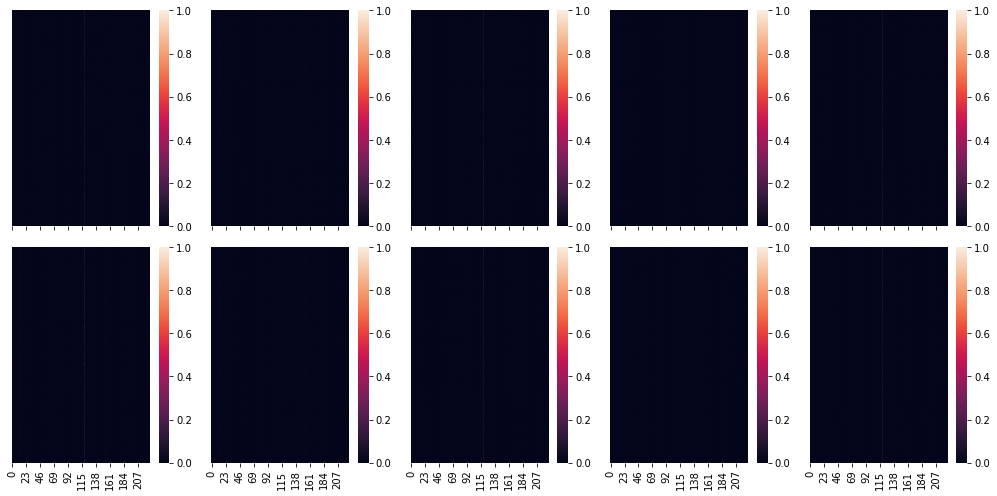

In [40]:
f, axes = plt.subplots(2, 5, figsize=(14, 7), sharex=True)
sns.despine(left=True)
seaborn.heatmap(dist_mat_mds[:,:,0],vmin=None,vmax=1,ax=axes[0, 0])
seaborn.heatmap(dist_mat_mds[:,:,1],vmin=None,vmax=1,ax=axes[0, 1])
seaborn.heatmap(dist_mat_mds[:,:,2],vmin=None,vmax=1,ax=axes[0, 2])
seaborn.heatmap(dist_mat_mds[:,:,3],vmin=None,vmax=1,ax=axes[0, 3])
seaborn.heatmap(dist_mat_mds[:,:,4],vmin=None,vmax=1,ax=axes[0, 4])
seaborn.heatmap(dist_mat_mds[:,:,5],vmin=None,vmax=1,ax=axes[1, 0])
seaborn.heatmap(dist_mat_mds[:,:,6],vmin=None,vmax=1,ax=axes[1, 1])
seaborn.heatmap(dist_mat_mds[:,:,7],vmin=None,vmax=1,ax=axes[1, 2])
seaborn.heatmap(dist_mat_mds[:,:,8],vmin=None,vmax=1,ax=axes[1, 3])
seaborn.heatmap(dist_mat_mds[:,:,9],vmin=None,vmax=1,ax=axes[1, 4])
plt.setp(axes, yticks=[])
plt.tight_layout()

In [41]:
import math

In [42]:
def mean2(x):
    y = np.sum(x) / np.size(x);
    return y

def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / math.sqrt((a*a).sum() * (b*b).sum());
    return r

In [34]:
corr=np.zeros([10,10])
for i in range(0,10):
    for j in range(0,10):
        corr[i,j]=corr2(dist_mat_pca[:,:,i],dist_mat_pca[:,:,j])

NameError: name 'dist_mat_pca' is not defined

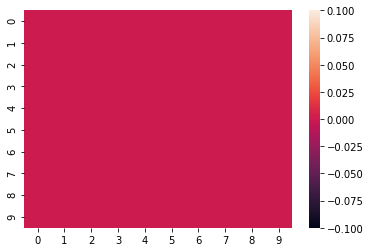

In [35]:
seaborn.heatmap(corr)
plt.show()

In [43]:
corr=np.zeros([10,10])
for i in range(0,10):
    for j in range(0,10):
        corr[i,j]=corr2(dist_mat_mds[:,:,i],dist_mat_mds[:,:,j])

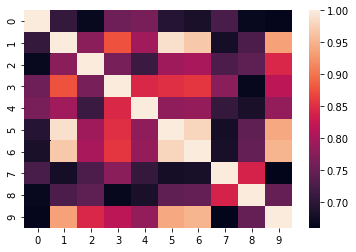

In [44]:
seaborn.heatmap(corr)
plt.show()

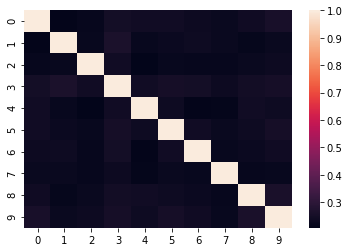

In [86]:
corr=np.zeros([10,10])
for i in range(0,10):
    for j in range(0,10):
        corr[i,j]=corr2(dist_mat_umap[:,:,i],dist_mat_umap[:,:,j])
seaborn.heatmap(corr)
plt.show()

In [79]:
data=pd.read_csv('MKL_train.csv')
out=data['out']

In [50]:
data1=data.iloc[:,0:5]
data2=data.iloc[:,0:15]
data3=data.iloc[:,0:50]
data4=data.iloc[:,0:200]

In [88]:
lens = [[Filter.L1Centrality()],[Filter.LinfCentrality()],[Filter.GaussianDensity(h=1)],[Filter.GaussianDensity(h=5)],
        [Filter.GaussianDensity(h=8)],[Filter.GaussianDensity(h=10)],[Filter.PCA(components=[0])],[Filter.PCA(components=[1])],
        [Filter.PCA(components=[2])],[Filter.PCA(components=[3])],[Filter.TSNE(components=[0])],[Filter.TSNE(components=[1])],
        [Filter.TSNE(components=[2])],[Filter.MDS(components=[0])],[Filter.MDS(components=[1])],
        [Filter.MDS(components=[2])],[Filter.MDS(components=[3])],[Filter.UMAP(components=[0])],[Filter.UMAP(components=[1])],
        [Filter.UMAP(components=[2])],[Filter.UMAP(components=[3])]]

Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


100%|██████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 3558.08it/s]

Filtering has been completed.
Mapping on data (227, 5) using lens (227, 2)
...minimal number of points in hypercube to do clustering: 1
...create 401 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.


...create 1535 edges.
Finish TDA mapping


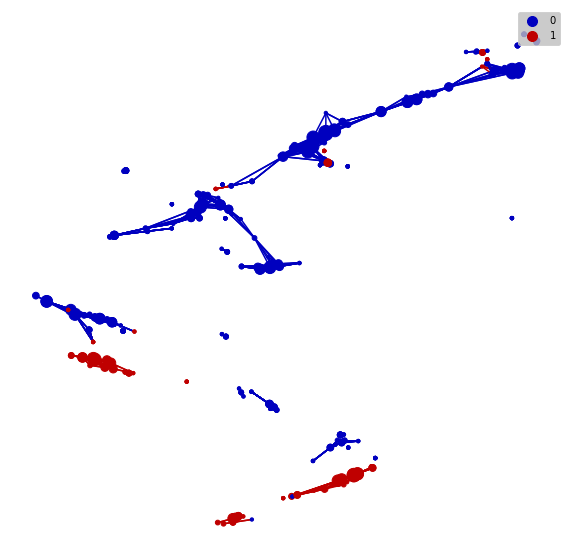

In [59]:
tm = mapper.Mapper(verbose=1)
projected_X = tm.filter(data1, lens=lens[18])
projected_X = tm.filter(data1, lens=lens[17])
clusterer = DBSCAN(eps=0.75,min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)
graph = tm.map(data=StandardScaler().fit_transform(data1), cover=cover, clusterer=clusterer)
color = Color(target=out, dtype="categorical",target_by='sample')
graph.show(color=color, fig_size=(10, 10), node_size=15,with_labels=True)

Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


100%|██████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 3238.94it/s]

Filtering has been completed.
Mapping on data (227, 15) using lens (227, 2)
...minimal number of points in hypercube to do clustering: 1
...create 1296 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.


...create 3518 edges.
Finish TDA mapping


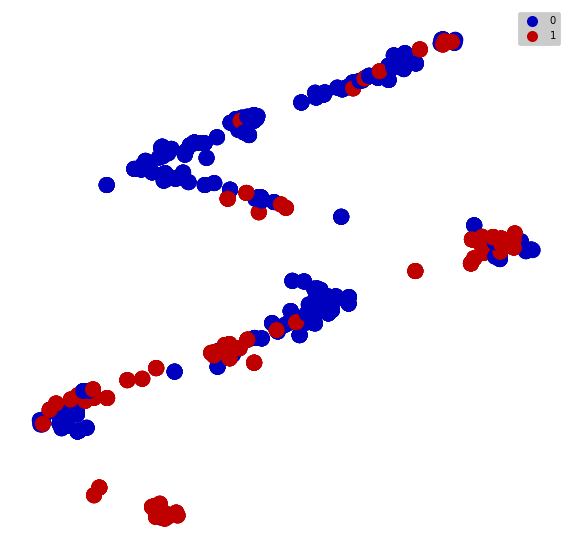

In [60]:
tm = mapper.Mapper(verbose=1)
projected_X = tm.filter(data2, lens=lens[18])
projected_X = tm.filter(data2, lens=lens[17])
clusterer = DBSCAN(eps=0.75,min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)
graph = tm.map(data=StandardScaler().fit_transform(data2), cover=cover, clusterer=clusterer)
color = Color(target=out, dtype="categorical",target_by='sample')
graph.show(color=color, fig_size=(10, 10), node_size=15,with_labels=True)

Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


100%|██████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 2595.49it/s]

Filtering has been completed.
Mapping on data (227, 50) using lens (227, 2)
...minimal number of points in hypercube to do clustering: 1
...create 1408 nodes.
...calculate projection coordinates of nodes.


...construct a TDA graph.
...create 4088 edges.
Finish TDA mapping


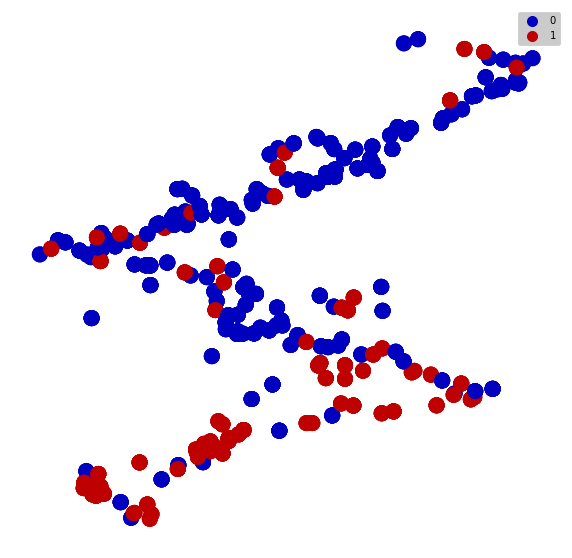

In [61]:
tm = mapper.Mapper(verbose=1)
projected_X = tm.filter(data3, lens=lens[18])
projected_X = tm.filter(data3, lens=lens[17])
clusterer = DBSCAN(eps=0.75,min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)
graph = tm.map(data=StandardScaler().fit_transform(data3), cover=cover, clusterer=clusterer)
color = Color(target=out, dtype="categorical",target_by='sample')
graph.show(color=color, fig_size=(10, 10), node_size=15,with_labels=True)

Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


 44%|██████████████████████████████████▌                                           | 177/400 [00:00<00:00, 1757.17it/s]

Filtering has been completed.


100%|██████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 1597.89it/s]


Mapping on data (227, 200) using lens (227, 2)
...minimal number of points in hypercube to do clustering: 1
...create 1389 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 3955 edges.
Finish TDA mapping


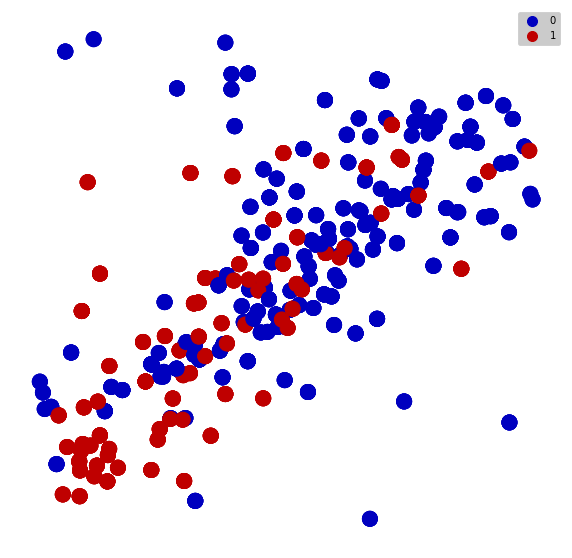

In [58]:
tm = mapper.Mapper(verbose=1)
projected_X = tm.filter(data4, lens=lens[18])
projected_X = tm.filter(data4, lens=lens[17])
clusterer = DBSCAN(eps=0.75,min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)
graph = tm.map(data=StandardScaler().fit_transform(data4), cover=cover, clusterer=clusterer)
color = Color(target=out, dtype="categorical",target_by='sample')
graph.show(color=color, fig_size=(10, 10), node_size=15,with_labels=True)

In [73]:
data_vec=[data1,data2,data3,data4]
accs=np.zeros([4,])
acc_vec=np.zeros([10,])
i=0
for data in data_vec:
    for ite in range(0,10):
        tm = mapper.Mapper(verbose=1)
        projected_X = tm.filter(data, lens=[Filter.MDS(components=[0])])
        projected_X = tm.filter(data, lens=[Filter.MDS(components=[1])])

        clf = svm.SVC()
        clf.fit(projected_X, out)
        y_pred=clf.predict(projected_X)
        acc=metrics.accuracy_score(out, y_pred)
        acc_vec[ite]=acc
    accs[i]=sum(acc_vec)/10
    i=i+1

Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.




Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.


C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

C:\Users\paula\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



Filtering has been completed.


In [72]:
accs#UMAP

array([0.81806167, 0.76519824, 0.75110132, 0.72995595])

In [74]:
accs#MDS

array([0.73788546, 0.67929515, 0.66519824, 0.66519824])

Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


100%|██████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 4224.22it/s]

Filtering has been completed.
Mapping on data (227, 5) using lens (227, 2)
...minimal number of points in hypercube to do clustering: 1
...create 390 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.


...create 1475 edges.
Finish TDA mapping


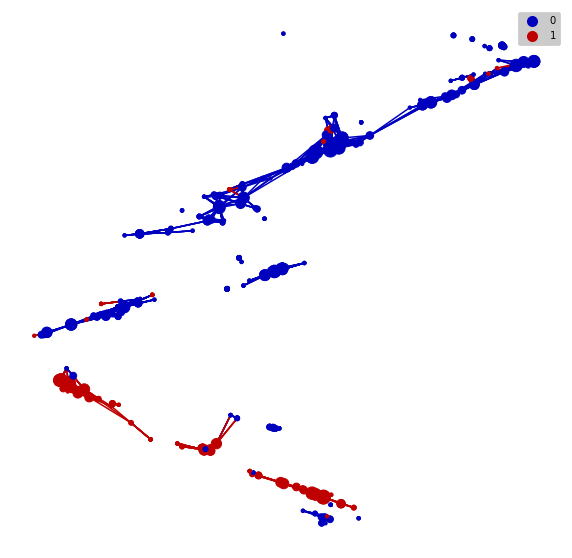

In [281]:
tm = mapper.Mapper(verbose=1)
projected_X = tm.filter(data1, lens=lens[18])
projected_X = tm.filter(data1, lens=lens[17])
clusterer = DBSCAN(eps=0.75,min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)
graph = tm.map(data=StandardScaler().fit_transform(data1), cover=cover, clusterer=clusterer)
color = Color(target=out, dtype="categorical",target_by='sample')
graph.show(color=color, fig_size=(10, 10), node_size=15,with_labels=True)

Estimated number of clusters: 3
Estimated number of noise points: 1
Homogeneity: 0.249
Completeness: 0.188
V-measure: 0.214
Adjusted Rand Index: 0.333
Adjusted Mutual Information: 0.206
Silhouette Coefficient: 0.124


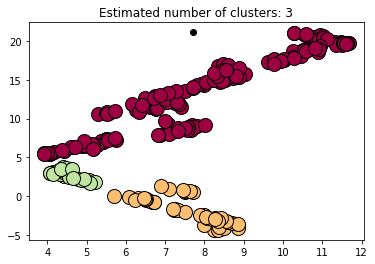

In [286]:
labels_true=out

# Compute DBSCAN
db = DBSCAN(eps=1.5).fit(projected_X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(projected_X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = projected_X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = projected_X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.
Filtering by UMAP.
...calculate Filter(which used to create cover) using the provided euclidean lens.


100%|██████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 4280.94it/s]

Filtering has been completed.
Mapping on data (227, 5) using lens (227, 2)
...minimal number of points in hypercube to do clustering: 1
...create 378 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.


...create 1439 edges.
Finish TDA mapping


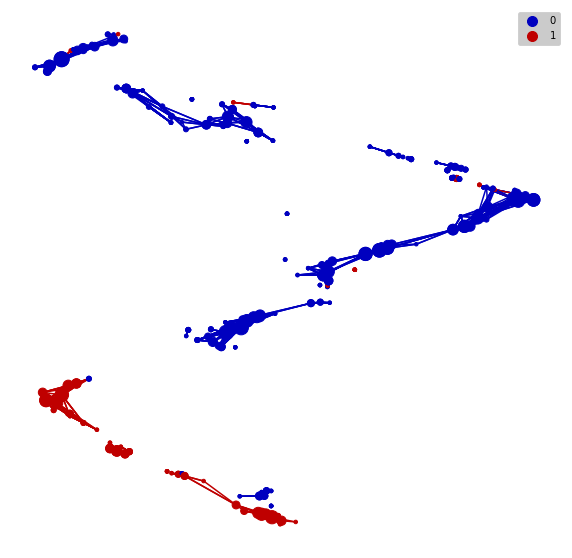

In [308]:
tm = mapper.Mapper(verbose=1)
projected_X2 = tm.filter(data1, lens=lens[18])
projected_X2 = tm.filter(data1, lens=lens[17])
clusterer = DBSCAN(eps=0.75,min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X2), resolution=20, overlap=0.75)
graph2 = tm.map(data=StandardScaler().fit_transform(data1), cover=cover, clusterer=clusterer)
color = Color(target=out, dtype="categorical",target_by='sample')
graph2.show(color=color, fig_size=(10, 10), node_size=15,with_labels=True)

Estimated number of clusters: 5
Estimated number of noise points: 1
Homogeneity: 0.350
Completeness: 0.154
V-measure: 0.213
Adjusted Rand Index: 0.216
Adjusted Mutual Information: 0.204
Silhouette Coefficient: 0.287


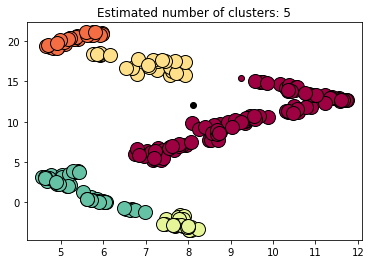

In [313]:
labels_true=out

# Compute DBSCAN
db = DBSCAN(eps=0.9).fit(projected_X2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(projected_X2, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = projected_X2[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = projected_X2[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [320]:
import scipy.io

In [323]:
scipy.io.savemat('test.mat',{'cluster':db.labels_})